Import statements, place any extra import statements below.

In [28]:
from core import *

Initialize the Orchestrator class.

In [29]:
orchestrator = Orchestrator()

Enter the name of the category of interest.

In [30]:
orchestrator.category_name()

Text(value='', description='Category:', placeholder='')

Button(description='Submit', style=ButtonStyle())

get_ed_directories() returns a list of dictionaries.
The key of each dictionary corresponds to the dataset number and data provider identifier and the value is a list of the data provider identifier and the json object. 

Here is an example:
```python
ed_directories = 
		[{dataset0_data_provider0: [data_provider0, json object]}
		 {dataset1_data_provider0: [data_provider0, json object]}
		 {dataset0_data_provider1: [data_provider1, json object]}  # This is another data provider's data set.
		 ...
		]
```

In [31]:
orchestrator.get_ed_datasets()

[]

To save directories, use the cell below.

In [32]:
ed_directories = orchestrator.get_ed_datasets()

To access a dataset dictionary in ed_datasets, uncomment the cell below:

In [33]:
# dataset_index = ...
# ed_dataset_dict = orchestrator.get_dataset_dicitonary(dataset_index)

# or ed_dataset_dict = ed_datasets[dataset_index]

To access a datase json in ed_datasets, you should get the dictionary (using cell above) and then use the key (there is only one) to access and get the second entry in the list:

In [34]:
# dataset_key = list(ed_dataset_dict.keys())
# dataset_json = ed_dataset.get(dataset_key[0])[1]

To get a dataframe of a sample dataset:

In [35]:
# dataset_df = pd.read_json(dataset_json)

Now that you are able to parse through ed_datasets, you can visualize the data.

Depending on the plot of choice:
- Histogram (generates histogram): index of the dataset, column name of the corresponding dataset json.
- Scatter (generates scatter plot): index of the dataset, column names of the corresponding dataset json.
- Compare Using Scatter (generates a scatter plot of two datasets using common columns in them): indices of the datasets, column names of the corresponding dataset json (they must both have the same columns for this to make sense).
- Describe (generates a summary of one dataset): index of the dataset and column name of the corresponding dataset json.
- Compare Using Columns (generates a summary of two datasets using specific columns): index of the datasets, column name of each corresponding dataset json (two column names, one for each dataset).



In [36]:
orchestrator.visualization_parameters()

RadioButtons(description='Method:', options=('histogram', 'scatter', 'compare using scatter', 'describe', 'compare using describe'), value='histogram')

Text(value='', description='Dataset 1:', placeholder='')

Text(value='', description='Dataset 2:', placeholder='')

Text(value='', description='Column 1:', placeholder='')

Text(value='', description='Column 2:', placeholder='')

Button(description='Submit', style=ButtonStyle())

Run this cell to visualize using the parameters above.

In [37]:
orchestrator.visualize()

Exception: Could not plot, invalid input format.

Check ED_component

In [38]:
df1 = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df2 = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df1.head()

,A,B,C,D
0,-1.803030,1.405454,-0.607380,-0.522271
1,-0.024189,0.191238,-0.510298,2.428264
2,-0.997173,-0.267355,-1.075450,-0.137474
3,1.719542,0.664695,-0.310412,-0.085619
4,0.975911,-0.684439,-0.064366,0.604090


In [39]:
EDComponent = EDComponent()

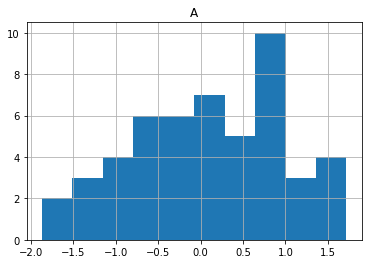

In [40]:
EDComponent.histogram(df1, 'A');

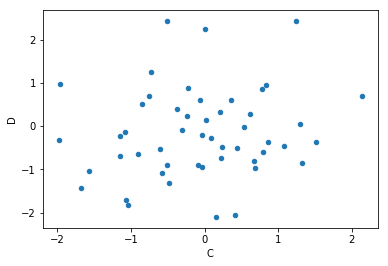

In [41]:
EDComponent.scatter(df1, 'C', 'D');

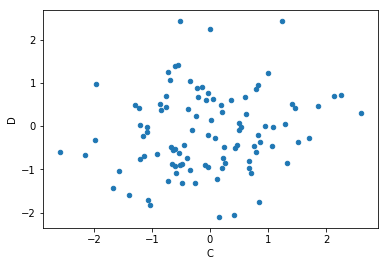

In [42]:
EDComponent.scatter_compare(df1, df2, 'C', 'D');

In [43]:
EDComponent.statistics(df1, 'D');

In [44]:
EDComponent.statistics_columns(df1, df2, 'A', 'B');